In [56]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [109]:
#Read in Covid data (by state), and group by month, year, and state
df = pd.read_excel("D:/Jupyter Notebooks/CovidDataKy/casesanddeathsbystate.xlsx")
df["submission_date"] = pd.to_datetime(df["submission_date"], format = "%m/%d/%y")
df.index = df["submission_date"]
dfGroupedMYS = df.groupby(by = [df["state"], df.index.month, df.index.year]).sum()

dfGroupedMYS.to_csv("D:/Jupyter Notebooks/CovidDataKy/states.csv")
dfStates = pd.read_csv("D:/Jupyter Notebooks/CovidDataKy/states.csv")

#Filter to only Kentucky, and filter further to include only (potential) new cases and deaths. Sort by date and create new columns for a  cumulative bar graph
dfKy = dfStates[dfStates["state"] == "KY"]
dfKy = dfKy.rename(columns={"submission_date": "month", "submission_date.1": "year"})
dfKy = dfKy.filter(items = ["state", "month", "year", "new_case", "pnew_case", "new_death", "pnew_death"])
dfKy["monthyear"] = dfKy["month"].astype(str) + "/" + dfKy["year"].astype(str)
dfKy["monthyear"] = pd.to_datetime(dfKy["monthyear"])
dfKy = dfKy.sort_values(by = ["monthyear"])
dfKy["total_new_case"] = dfKy['new_case'].cumsum()
dfKy["prev_new_case"] = dfKy['new_case'].cumsum() - dfKy["new_case"]
dfKy["total_pnew_case"] = dfKy['pnew_case'].cumsum()
dfKy["total_new_death"] = dfKy['new_death'].cumsum()
dfKy["total_pnew_death"] = dfKy['pnew_death'].cumsum()
dfKy.head(10)

#dfKy.to_csv("D:/Jupyter Notebooks/CovidDataKy/ky.csv")

,state,month,year,new_case,pnew_case,new_death,pnew_death,monthyear,total_new_case,prev_new_case,total_pnew_case,total_new_death,total_pnew_death
380,KY,1,2020,0,0.0,0,0.0,2020-01-01,0,0,0.0,0,0.0
382,KY,2,2020,0,0.0,0,0.0,2020-02-01,0,0,0.0,0,0.0
384,KY,3,2020,843,21.0,29,2.0,2020-03-01,843,0,21.0,29,2.0
386,KY,4,2020,4206,40.0,242,7.0,2020-04-01,5049,843,61.0,271,9.0
388,KY,5,2020,5427,188.0,239,10.0,2020-05-01,10476,5049,249.0,510,19.0
390,KY,6,2020,6619,530.0,174,6.0,2020-06-01,17095,10476,779.0,684,25.0
392,KY,7,2020,17392,1951.0,212,5.0,2020-07-01,34487,17095,2730.0,896,30.0
394,KY,8,2020,20435,3148.0,308,15.0,2020-08-01,54922,34487,5878.0,1204,45.0
395,KY,9,2020,20612,4682.0,307,13.0,2020-09-01,75534,54922,10560.0,1511,58.0
396,KY,10,2020,36953,7755.0,541,38.0,2020-10-01,112487,75534,18315.0,2052,96.0


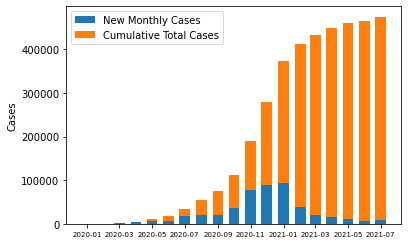

In [111]:
#Create cumulative bar graph displaying portion of new cases compared to overall cases per month
xLabels = dfKy["monthyear"]
fig, ax = plt.subplots()

ax.bar(xLabels, dfKy["new_case"], width = 20, label = "New Monthly Cases")
ax.bar(xLabels, dfKy[""prevnew_case"], width = 20, label = "Cumulative Total Cases", bottom = dfKy["new_case"])

ax.set_ylabel("Cases")
ax.legend()

plt.xticks(fontsize = 7)
plt.show()
